In [62]:
import pandas as pd
import numpy as np                     
import seaborn as sns                  # For data visualization
import matplotlib.pyplot as plt        # For plotting graphs
%matplotlib inline
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
import lightgbm as lgb
import pickle

In [2]:
# Read in test/train data
train=pd.read_csv("Training_Data_Abs_Data.csv")
test=pd.read_csv("Training_Data_Abs_Data.csv")
# Make copies
train_original=train.copy()
test_original=test.copy()
# Missing value treatment for plotting data
train = train.fillna(0)
test = test.fillna(0)
print train.dtypes
print "Shape of the train data "+str(train.shape)

Patient_Number                     int64
Blood_Pressure_Abnormality         int64
Level_of_Hemoglobin              float64
Genetic_Pedigree_Coefficient     float64
Age                                int64
BMI                                int64
Sex                                int64
Pregnancy                        float64
Smoking                            int64
Physical_activity                  int64
salt_content_in_the_diet           int64
alcohol_consumption_per_day      float64
Level_of_Stress                    int64
Chronic_kidney_disease             int64
Adrenal_and_thyroid_disorders      int64
dtype: object
Shape of the train data (2000, 15)


0    0.5065
1    0.4935
Name: Blood_Pressure_Abnormality, dtype: float64


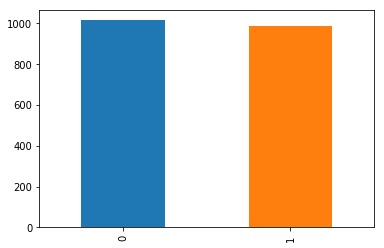

In [3]:
# Plot target variable distribution
print train['Blood_Pressure_Abnormality'].value_counts(normalize=True)
train['Blood_Pressure_Abnormality'].value_counts().plot.bar()
# Target Variable is spread across uniformly with almost 50/50 values

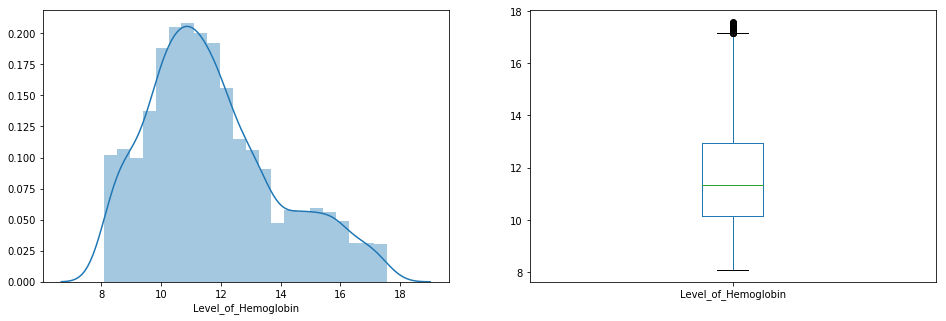

In [4]:
# Univariate analysis for Level_of_Hemoglobin(Continuous Variable)
plt.figure(1)
plt.subplot(121)
sns.distplot(train['Level_of_Hemoglobin']);

plt.subplot(122)
train['Level_of_Hemoglobin'].plot.box(figsize=(16,5))

plt.show()
# Level_of_Hemoglobin is almost normally distributed with a little positive skew
# The boxplot confirms the presence of some outliers too.

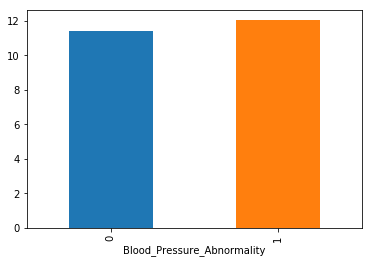

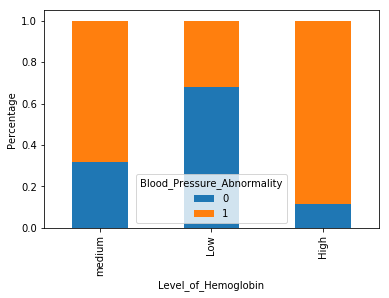

In [5]:
# Bivariate Analysis
# Now, We will try to find the mean Hemoglobin of people for which the Blood pressure is high and low seperately.
train.groupby('Blood_Pressure_Abnormality')['Level_of_Hemoglobin'].mean().plot.bar()
# We don't see any any change in the mean haemoglobin. Now we'll make bins for levels of haemoglobin
bins=[8,10,14,18]
group=['Low','medium','High']
train['Haemoglobin_bin']=pd.cut(train['Level_of_Hemoglobin'],bins,labels=group)

Haemoglobin_bin=pd.crosstab(train['Haemoglobin_bin'],train['Blood_Pressure_Abnormality'])
Haemoglobin_bin.div(Haemoglobin_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Level_of_Hemoglobin')
P = plt.ylabel('Percentage')
# It can be clearly inferred from here that people with low levels of haemoglobin are less prone to high/low bp and as the haemoglobin content
# increases the number of high/low bp cases increases.

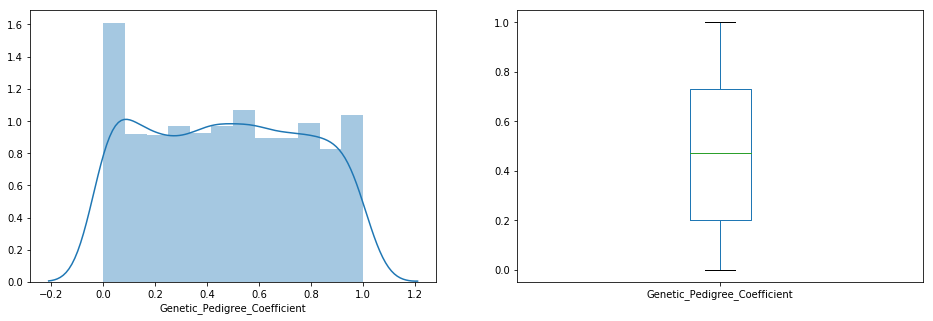

In [6]:
# Univariate analysis for Genetic_Pedigree_Coefficient(Continuous Variable)
train['Genetic_Pedigree_Coefficient'] = train['Genetic_Pedigree_Coefficient'].fillna(0)
plt.figure(1)
plt.subplot(121)
sns.distplot(train['Genetic_Pedigree_Coefficient']);

plt.subplot(122)
train['Genetic_Pedigree_Coefficient'].plot.box(figsize=(16,5))

plt.show()
# Genetic_Pedigree_Coefficient is not normally distributed and is platykurtic
# Genetic_Pedigree_Coefficient has no outliers.

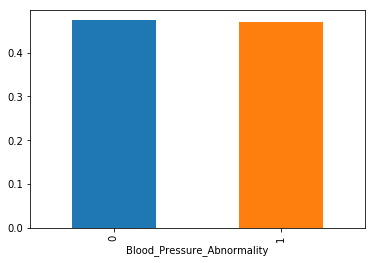

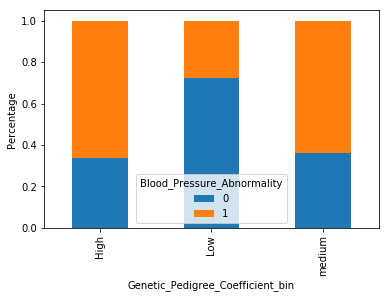

In [7]:
# Now, We will try to find the mean Genetic_Pedigree_Coefficient of people for which the Blood pressure is high and low seperately.
train.groupby('Blood_Pressure_Abnormality')['Genetic_Pedigree_Coefficient'].mean().plot.bar()
# We don't see any any change in the mean haemoglobin. Now we'll make bins for level of haemoglobin

bins=[0.0,0.3,0.7,1.0]
group=['Low','medium','High']
train['Genetic_Pedigree_Coefficient_bin']=pd.cut(train['Genetic_Pedigree_Coefficient'],bins,labels=group)

Genetic_Pedigree_Coefficient_bin=pd.crosstab(train['Genetic_Pedigree_Coefficient_bin'],train['Blood_Pressure_Abnormality'])
Genetic_Pedigree_Coefficient_bin.div(Genetic_Pedigree_Coefficient_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Genetic_Pedigree_Coefficient_bin')
P = plt.ylabel('Percentage')
# It can be inferred here that people with higher genetic pedigree values are more prone to have high/low BP.

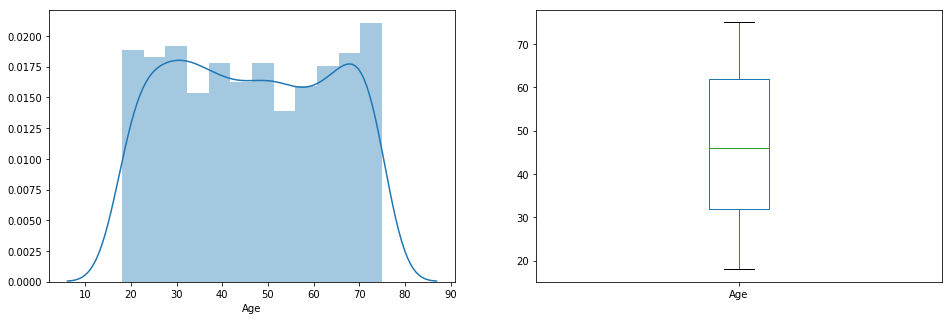

In [8]:
# Univariate analysis for Age(Continuous Variable)
plt.figure(1)
plt.subplot(121)
sns.distplot(train['Age']);

plt.subplot(122)
train['Age'].plot.box(figsize=(16,5))

plt.show()
# Age is not normally distributed and is platykurtic
# Age has no outliers.

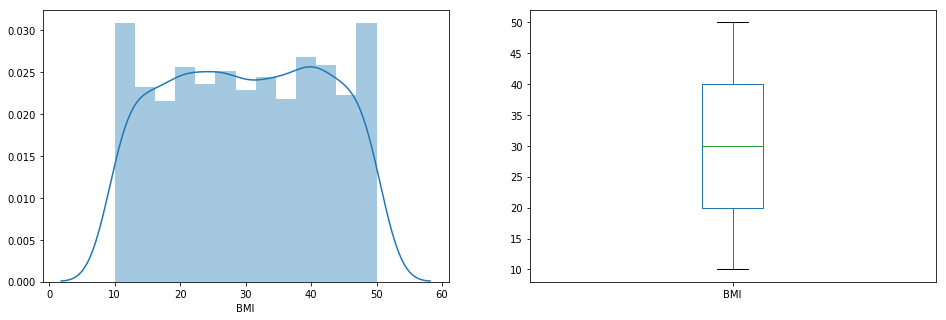

In [9]:
# Univariate analysis for BMI(Continuous Variable)
plt.figure(1)
plt.subplot(121)
sns.distplot(train['BMI']);

plt.subplot(122)
train['BMI'].plot.box(figsize=(16,5))

plt.show()
# BMI is not normally distributed and is platykurtic
# BMI has no outliers.

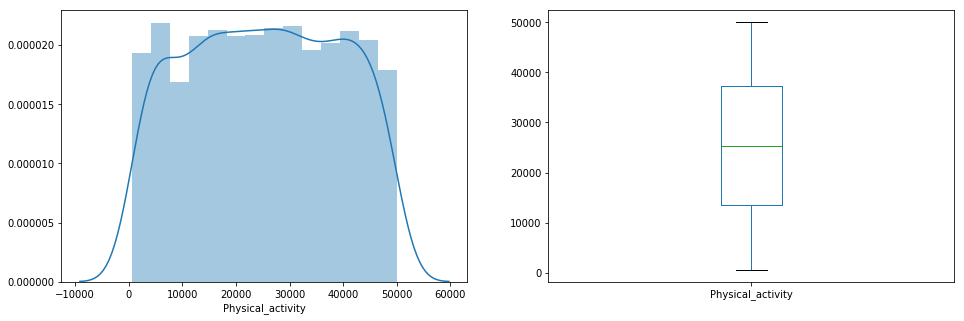

In [10]:
# Univariate analysis for Physical_activity(Continuous Variable)
plt.figure(1)
plt.subplot(121)
sns.distplot(train['Physical_activity']);

plt.subplot(122)
train['Physical_activity'].plot.box(figsize=(16,5))

plt.show()
# Physical_activity is not normally distributed and is platykurtic
# Physical_activity has no outliers.

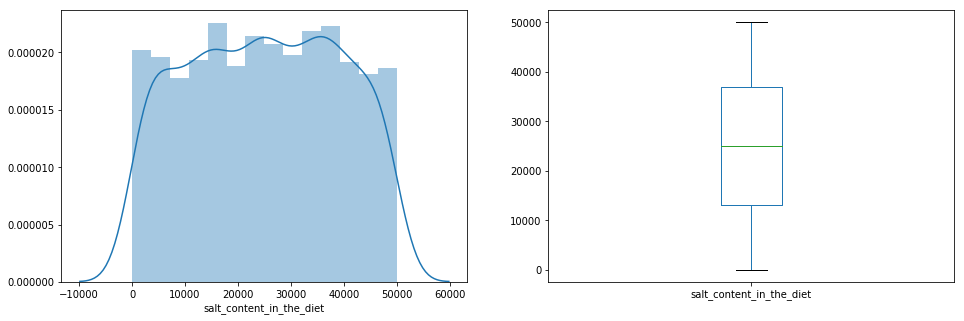

In [11]:
# Univariate analysis for salt_content_in_the_diet(Continuous Variable)
plt.figure(1)
plt.subplot(121)
sns.distplot(train['salt_content_in_the_diet']);

plt.subplot(122)
train['salt_content_in_the_diet'].plot.box(figsize=(16,5))

plt.show()
# salt_content_in_the_diet is not normally distributed and is platykurtic
# salt_content_in_the_diet has no outliers.

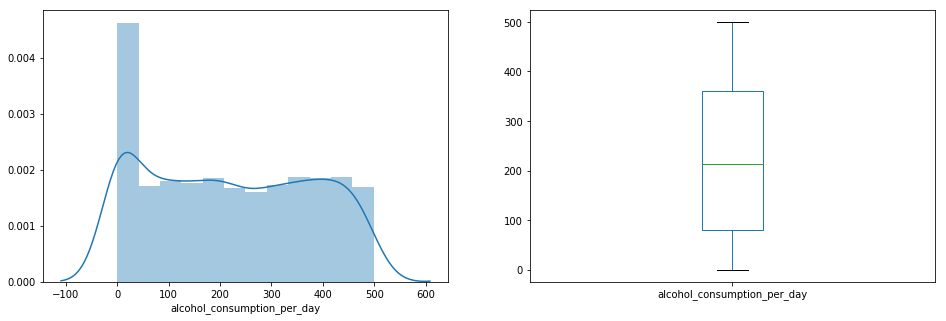

In [12]:
# Univariate analysis for alcohol_consumption_per_day(Continuous Variable)
plt.figure(1)
plt.subplot(121)
sns.distplot(train['alcohol_consumption_per_day']);

plt.subplot(122)
train['alcohol_consumption_per_day'].plot.box(figsize=(16,5))

plt.show()
# alcohol_consumption_per_day is not normally distributed
# alcohol_consumption_per_day has no outliers.

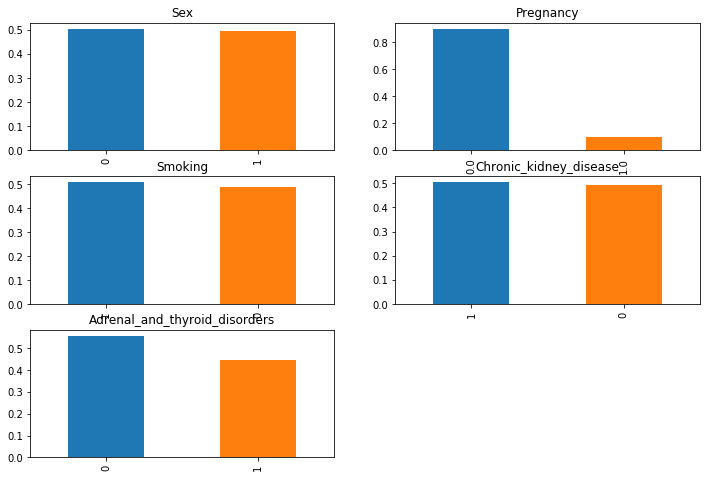

In [13]:
# Univariate analysis categorical variables
plt.figure(1)
plt.subplot(321)
train['Sex'].value_counts(normalize=True).plot.bar(figsize=(12,8), title= 'Sex')
# The population is roughly evenly divided between males and females.

plt.subplot(322)
train['Pregnancy'].value_counts(normalize=True).plot.bar(title= 'Pregnancy')
# Roughly 5-10% of the population comprises of pregnant women.

plt.subplot(323)
train['Smoking'].value_counts(normalize=True).plot.bar(title= 'Smoking')
# The population is roughly evenly divided into smokers and non-smokers.

plt.subplot(324)
train['Chronic_kidney_disease'].value_counts(normalize=True).plot.bar(title= 'Chronic_kidney_disease')
# The population is roughly evenly divided into people having kidney disease and not

plt.subplot(325)
train['Adrenal_and_thyroid_disorders'].value_counts(normalize=True).plot.bar(title= 'Adrenal_and_thyroid_disorders')
# Roughly 40% of the people have thyroid disorders.

plt.show()

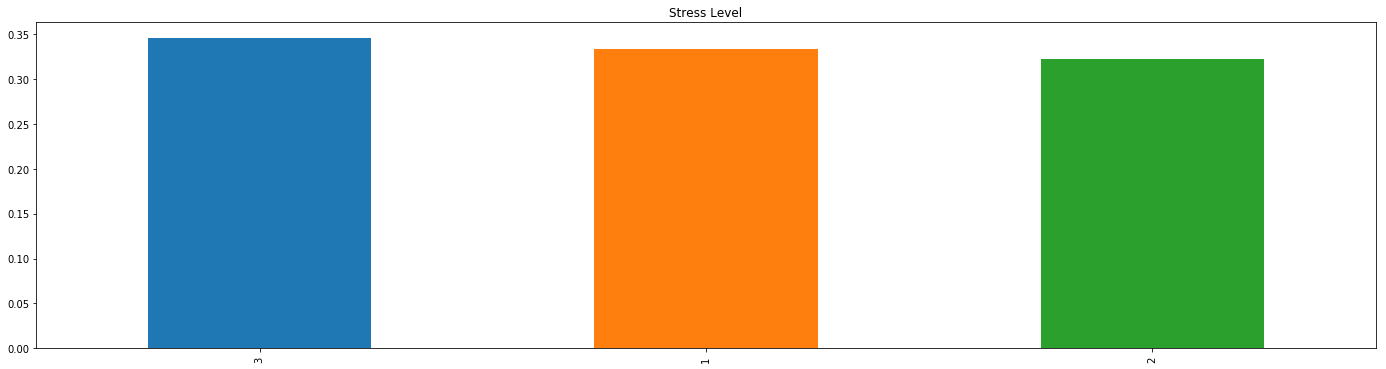

In [14]:
# Univariate analysis for ordinal variable stress level
train['Level_of_Stress'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Stress Level')
# Stress is evenly divided into 3 classes.

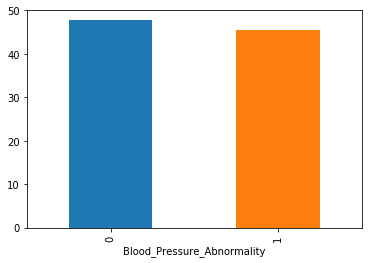

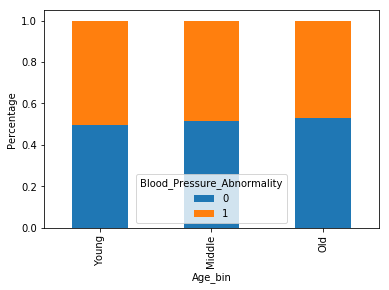

In [15]:
# Now, We will try to find the mean Age of people for which the Blood pressure is high and low seperately.
train.groupby('Blood_Pressure_Abnormality')['Age'].mean().plot.bar()
# We don't see any any change in the mean Age. Now we'll make bins for levels of Age
bins=[20,35,65,80]
group=['Young','Middle','Old']
train['Age_bin']=pd.cut(train['Age'],bins,labels=group)

Age_bin=pd.crosstab(train['Age_bin'],train['Blood_Pressure_Abnormality'])
Age_bin.div(Age_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Age_bin')
P = plt.ylabel('Percentage')
# It can be inferred here that as age progresses chances of having high BP slightly increases.

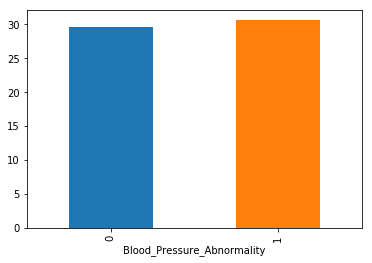

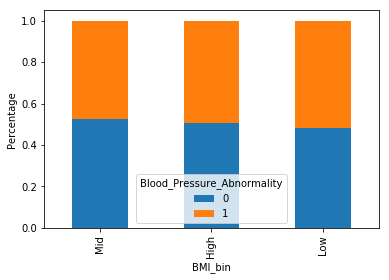

In [16]:
# Now, We will try to find the mean BMI of people for which the Blood pressure is high and low seperately.
train.groupby('Blood_Pressure_Abnormality')['BMI'].mean().plot.bar()
# We don't see any any change in the mean BMI. Now we'll make bins for levels of BMI
bins=[10,20,40,50]
group=['Low','Mid','High']
train['BMI_bin']=pd.cut(train['BMI'],bins,labels=group)

BMI_bin=pd.crosstab(train['BMI_bin'],train['Blood_Pressure_Abnormality'])
BMI_bin.div(BMI_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('BMI_bin')
P = plt.ylabel('Percentage')
# It can be inferred here that as BMI increases chances of high/low BP slightly increase.

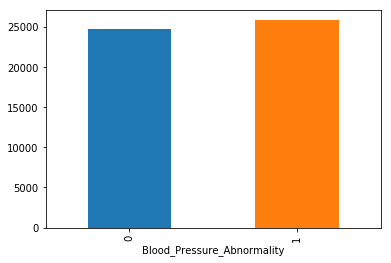

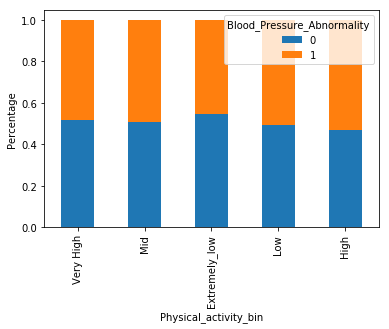

In [17]:
# Now, We will try to find the mean Physical_activity of people for which the Blood pressure is high and low seperately.
train.groupby('Blood_Pressure_Abnormality')['Physical_activity'].mean().plot.bar()
# We don't see any any change in the mean Physical_activity. Now we'll make bins for levels of Physical_activity
bins=[0,10000,20000,30000,40000,50000]
group=['Extremely_low','Low','Mid','High','Very High']
train['Physical_activity_bin']=pd.cut(train['Physical_activity'],bins,labels=group)

Physical_activity_bin=pd.crosstab(train['Physical_activity_bin'],train['Blood_Pressure_Abnormality'])
Physical_activity_bin.div(Physical_activity_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Physical_activity_bin')
P = plt.ylabel('Percentage')
# It can be inferred here that people with low and extremely low levels of Physical_activity_ are more prone to high/low bp 
# but its not very clearly distinguished here.

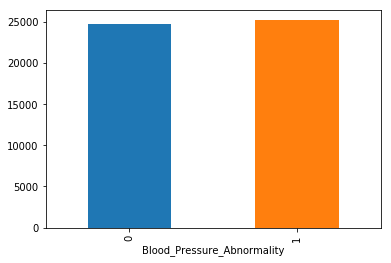

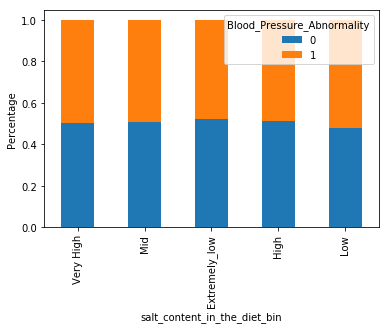

In [18]:
# Now, We will try to find the mean salt_content_in_the_diet of people for which the Blood pressure is high and low seperately.
train.groupby('Blood_Pressure_Abnormality')['salt_content_in_the_diet'].mean().plot.bar()
# We don't see any change in the mean salt_content_in_the_diet. Now we'll make bins for levels of salt_content_in_the_diet
bins=[0,10000,20000,30000,40000,50000]
group=['Extremely_low','Low','Mid','High','Very High']
train['salt_content_in_the_diet_bin']=pd.cut(train['salt_content_in_the_diet'],bins,labels=group)

salt_content_in_the_diet_bin=pd.crosstab(train['salt_content_in_the_diet_bin'],train['Blood_Pressure_Abnormality'])
salt_content_in_the_diet_bin.div(salt_content_in_the_diet_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('salt_content_in_the_diet_bin')
P = plt.ylabel('Percentage')
# It can be inferred here that people with extremely low and very high levels of salt content are more prone to high/low bp 

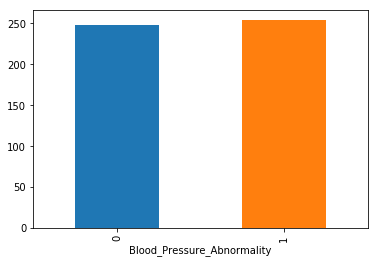

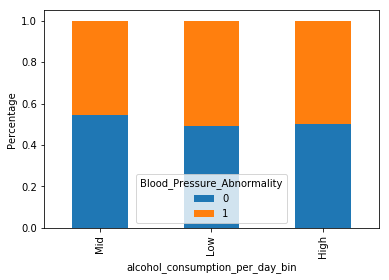

In [41]:
# Now, We will try to find the mean alcohol_consumption_per_day of people for which the Blood pressure is high and low seperately.
train.groupby('Blood_Pressure_Abnormality')['alcohol_consumption_per_day'].mean().plot.bar()
# We don't see any any change in the mean alcohol_consumption_per_day. Now we'll make bins for levels of alcohol_consumption_per_day
bins=[0,150,350,500]
group=['Low','Mid','High']
train['alcohol_consumption_per_day_bin']=pd.cut(train['alcohol_consumption_per_day'],bins,labels=group)

alcohol_consumption_per_day_bin=pd.crosstab(train['alcohol_consumption_per_day_bin'],train['Blood_Pressure_Abnormality'])
alcohol_consumption_per_day_bin.div(alcohol_consumption_per_day_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('alcohol_consumption_per_day_bin')
P = plt.ylabel('Percentage')
# People with mid to high alcohol_consumption_per_day have slightly more chances of low/high bp

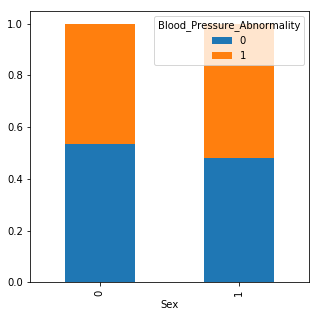

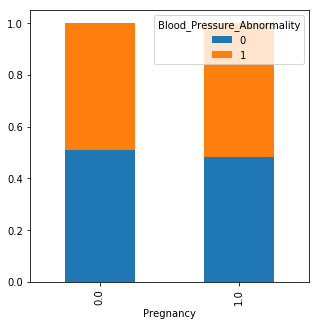

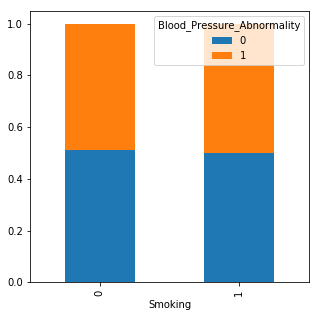

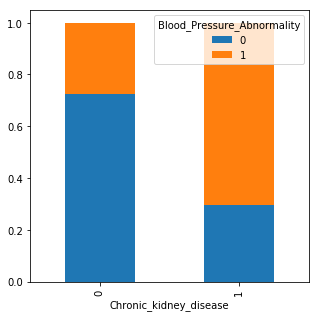

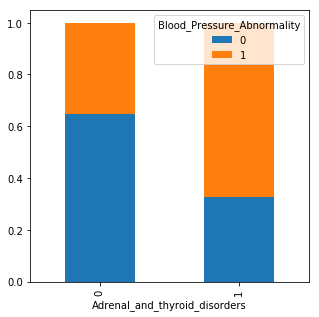

In [20]:
# Categorical independent variables vs target variable
Sex=pd.crosstab(train['Sex'],train['Blood_Pressure_Abnormality'])
Sex.div(Sex.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(5,5))

Pregnancy=pd.crosstab(train['Pregnancy'],train['Blood_Pressure_Abnormality'])
Pregnancy.div(Pregnancy.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(5,5))

Smoking=pd.crosstab(train['Smoking'],train['Blood_Pressure_Abnormality'])
Smoking.div(Smoking.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(5,5))

Chronic_kidney_disease=pd.crosstab(train['Chronic_kidney_disease'],train['Blood_Pressure_Abnormality'])
Chronic_kidney_disease.div(Chronic_kidney_disease.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(5,5))

Adrenal_and_thyroid_disorders=pd.crosstab(train['Adrenal_and_thyroid_disorders'],train['Blood_Pressure_Abnormality'])
Adrenal_and_thyroid_disorders.div(Adrenal_and_thyroid_disorders.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(5,5))


In [21]:
# Missing value imputation
train = train_original
test = test_original
train.isnull().sum()
# We have missing values for Genetic_Pedigree_Coefficient,Pregnancy and alcohol_consumption_per_day

Patient_Number                      0
Blood_Pressure_Abnormality          0
Level_of_Hemoglobin                 0
Genetic_Pedigree_Coefficient       92
Age                                 0
BMI                                 0
Sex                                 0
Pregnancy                        1558
Smoking                             0
Physical_activity                   0
salt_content_in_the_diet            0
alcohol_consumption_per_day       242
Level_of_Stress                     0
Chronic_kidney_disease              0
Adrenal_and_thyroid_disorders       0
dtype: int64

In [22]:
# We'll replace missing values for these two continuous variables by the mean of the data since they don't have any outliers.
train['Genetic_Pedigree_Coefficient'].fillna(train['Genetic_Pedigree_Coefficient'].mean(), inplace=True)
train['alcohol_consumption_per_day'].fillna(train['alcohol_consumption_per_day'].mean(), inplace=True)
# We'll replace all missing values for pregnancy with 0
train['Pregnancy'] = train['Pregnancy'].fillna(0)
train.isnull().sum()
# We have no missing values for Genetic_Pedigree_Coefficient,Pregnancy and alcohol_consumption_per_day now

Patient_Number                   0
Blood_Pressure_Abnormality       0
Level_of_Hemoglobin              0
Genetic_Pedigree_Coefficient     0
Age                              0
BMI                              0
Sex                              0
Pregnancy                        0
Smoking                          0
Physical_activity                0
salt_content_in_the_diet         0
alcohol_consumption_per_day      0
Level_of_Stress                  0
Chronic_kidney_disease           0
Adrenal_and_thyroid_disorders    0
dtype: int64

In [23]:
# dropping the patient id variable for modelling
train=train.drop('Patient_Number',axis=1)
test=test.drop('Patient_Number',axis=1)
# drop target variable for modelling.
X = train.drop('Blood_Pressure_Abnormality',1)
# create target variable
y = train.Blood_Pressure_Abnormality
# splitting data set for cross validation
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)
model = LogisticRegression()
model.fit(x_train, y_train)
pred_cv = model.predict(x_cv)
accuracy_score(y_cv,pred_cv)

0.7283333333333334

In [24]:
# Preparing test data for prediction 
# We'll replace missing values for these two continuous variables by the mean of the data since they don't have any outliers.
test['Genetic_Pedigree_Coefficient'].fillna(test['Genetic_Pedigree_Coefficient'].mean(), inplace=True)
test['alcohol_consumption_per_day'].fillna(test['alcohol_consumption_per_day'].mean(), inplace=True)
# We'll replace all missing values for pregnancy with 0
test['Pregnancy'] = test['Pregnancy'].fillna(0)
test.isnull().sum()
# We have no missing values for Genetic_Pedigree_Coefficient,Pregnancy and alcohol_consumption_per_day now
test = test.drop('Blood_Pressure_Abnormality',1)
pred_test = model.predict(test)

In [47]:
i=1
mean_score = 0
kf = StratifiedKFold(n_splits=10,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
    
     model = LogisticRegression(random_state=1)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     i+=1
     mean_score+=score
pred_test = model.predict(test)
pred=model.predict_proba(xvl)[:,1]
print 'Mean accuracy score is '+str(mean_score/10)


1 of kfold 10
('accuracy_score', 0.736318407960199)

2 of kfold 10
('accuracy_score', 0.7164179104477612)

3 of kfold 10
('accuracy_score', 0.6716417910447762)

4 of kfold 10
('accuracy_score', 0.7)

5 of kfold 10
('accuracy_score', 0.725)

6 of kfold 10
('accuracy_score', 0.71)

7 of kfold 10
('accuracy_score', 0.67)

8 of kfold 10
('accuracy_score', 0.7839195979899497)

9 of kfold 10
('accuracy_score', 0.6934673366834171)

10 of kfold 10
('accuracy_score', 0.7185929648241206)
Mean accuracy score is 0.7125358008950224


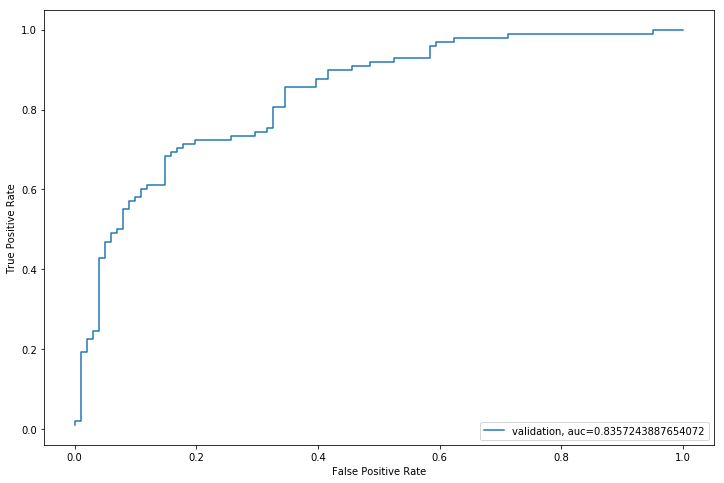

In [49]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl,  pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [53]:
i=1
mean_score = 0
kf = StratifiedKFold(n_splits=10,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
    
     model = tree.DecisionTreeClassifier(random_state=1)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     i+=1
     mean_score+=score
pred_test = model.predict(test)
print 'mean accuracy score is '+str(mean_score/10)


1 of kfold 10
('accuracy_score', 0.8308457711442786)

2 of kfold 10
('accuracy_score', 0.8208955223880597)

3 of kfold 10
('accuracy_score', 0.8706467661691543)

4 of kfold 10
('accuracy_score', 0.795)

5 of kfold 10
('accuracy_score', 0.84)

6 of kfold 10
('accuracy_score', 0.82)

7 of kfold 10
('accuracy_score', 0.845)

8 of kfold 10
('accuracy_score', 0.8592964824120602)

9 of kfold 10
('accuracy_score', 0.8492462311557789)

10 of kfold 10
('accuracy_score', 0.8140703517587939)
mean accuracy score is 0.8345001125028126


In [54]:
i=1
mean_score=0
kf = StratifiedKFold(n_splits=10,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
    
     model = RandomForestClassifier(random_state=1, max_depth=10)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     i+=1
     mean_score+=score
pred_test = model.predict(test)
print 'Mean accuracy score is '+str(mean_score/10)


1 of kfold 10
('accuracy_score', 0.845771144278607)

2 of kfold 10
('accuracy_score', 0.8507462686567164)

3 of kfold 10
('accuracy_score', 0.8756218905472637)

4 of kfold 10
('accuracy_score', 0.87)

5 of kfold 10
('accuracy_score', 0.86)

6 of kfold 10
('accuracy_score', 0.875)

7 of kfold 10
('accuracy_score', 0.87)

8 of kfold 10
('accuracy_score', 0.914572864321608)

9 of kfold 10
('accuracy_score', 0.8793969849246231)

10 of kfold 10
('accuracy_score', 0.8542713567839196)
Mean accuracy score is 0.8695380509512738


In [55]:
# Provide range for max_depth from 1 to 20 with an interval of 2 and from 1 to 200 with an interval of 20 for n_estimators
paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}

grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3, random_state=1)
# Fit the grid search model
grid_search.fit(x_train,y_train)
# Estimating the optimized value
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=101, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [56]:
i=1
mean_score=0
kf = StratifiedKFold(n_splits=10,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
    
     model = RandomForestClassifier(random_state=1, max_depth=15, n_estimators=101)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     i+=1
     mean_score+=score
pred_test = model.predict(test)
pred2=model.predict_proba(test)[:,1]
print 'Mean accuracy score is '+str(mean_score/10)


1 of kfold 10
('accuracy_score', 0.8557213930348259)

2 of kfold 10
('accuracy_score', 0.8756218905472637)

3 of kfold 10
('accuracy_score', 0.9054726368159204)

4 of kfold 10
('accuracy_score', 0.865)

5 of kfold 10
('accuracy_score', 0.885)

6 of kfold 10
('accuracy_score', 0.865)

7 of kfold 10
('accuracy_score', 0.905)

8 of kfold 10
('accuracy_score', 0.9095477386934674)

9 of kfold 10
('accuracy_score', 0.9195979899497487)

10 of kfold 10
('accuracy_score', 0.8944723618090452)
Mean accuracy score is 0.8880434010850271


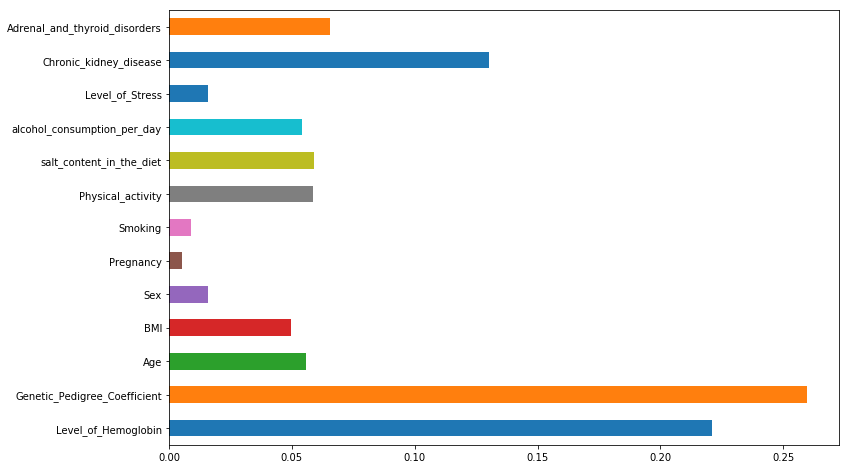

In [31]:
importances=pd.Series(model.feature_importances_, index=X.columns)
importances.plot(kind='barh', figsize=(12,8))

In [57]:
i=1
mean_score=0
kf = StratifiedKFold(n_splits=10,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
    
     model = XGBClassifier(n_estimators=50, max_depth=4)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     i+=1
     mean_score+=score
pred_test = model.predict(test)
pred3=model.predict_proba(test)[:,1]
print 'Mean accuracy score is '+str(mean_score/10)


1 of kfold 10
('accuracy_score', 0.8557213930348259)

2 of kfold 10


/usr/lib64/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/lib64/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/lib64/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


('accuracy_score', 0.8606965174129353)

3 of kfold 10
('accuracy_score', 0.9253731343283582)

4 of kfold 10
('accuracy_score', 0.88)

5 of kfold 10


/usr/lib64/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/lib64/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/lib64/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


('accuracy_score', 0.895)

6 of kfold 10
('accuracy_score', 0.895)

7 of kfold 10
('accuracy_score', 0.915)

8 of kfold 10


/usr/lib64/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/lib64/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/lib64/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


('accuracy_score', 0.9195979899497487)

9 of kfold 10
('accuracy_score', 0.9346733668341709)

10 of kfold 10
('accuracy_score', 0.8944723618090452)
Mean accuracy score is 0.8975534763369083


/usr/lib64/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/lib64/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


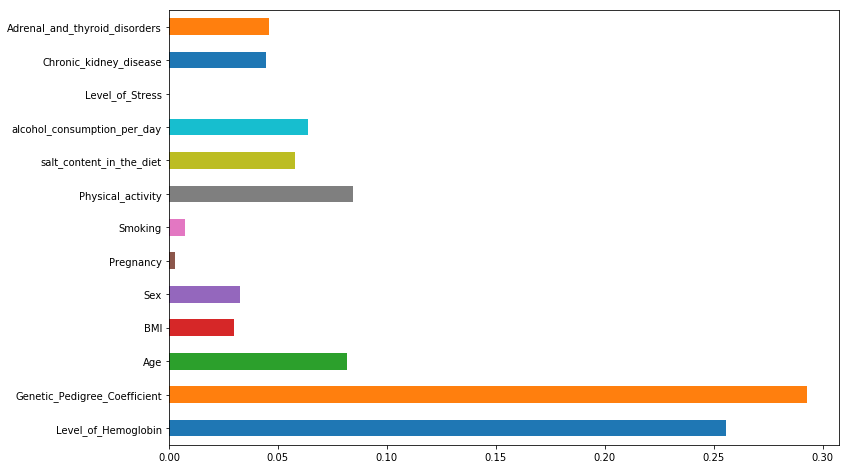

In [58]:
importances=pd.Series(model.feature_importances_, index=X.columns)
importances.plot(kind='barh', figsize=(12,8))

In [63]:
def pickle_model(model, fPath):
    # dump model with pickle
    with open(fPath, 'wb') as fout:
        pickle.dump(model, fout)

RESULTS_PATH = '/nfs/science/shared/ipythonNotebooks/abhinavh/'
pickleFPath = RESULTS_PATH+'Case_Study_Abs_Dat_Final_Model.pkl'
pickle_model(model, pickleFPath)


In [ ]:
# Scoring for OOT
pkl_file = open('/nfs/science/shared/ipythonNotebooks/abhinavh/Case_Study_Abs_Dat_Final_Model'+'.pkl', 'rb')
model = pickle.load(pkl_file)
